## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data=mouse_metadata.merge(study_results,on="Mouse ID")
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Checking the number of mice in the DataFrame.

total_mice=len(study_results["Mouse ID"].unique())

pd.DataFrame({
    "Total number of mice": [total_mice]
})

,Total number of mice
0,249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

study_results.loc[study_results["Mouse ID"]=="g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

complete_data=complete_data.set_index("Mouse ID")
complete_data.head()
clean_complete_data=complete_data.drop(index='g989')
clean_complete_data=clean_complete_data.reset_index()
clean_complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
clean_complete_data.loc[clean_complete_data["Mouse ID"]=="f545",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
841,f545,Zoniferol,Female,20,26,0,45.000000,0
842,f545,Zoniferol,Female,20,26,5,46.565813,0
843,f545,Zoniferol,Female,20,26,10,51.072512,0
844,f545,Zoniferol,Female,20,26,15,53.945544,1
845,f545,Zoniferol,Female,20,26,20,58.841189,1
846,f545,Zoniferol,Female,20,26,25,60.253481,1
847,f545,Zoniferol,Female,20,26,30,65.893986,1
848,f545,Zoniferol,Female,20,26,35,66.742924,1
849,f545,Zoniferol,Female,20,26,40,71.108118,1
850,f545,Zoniferol,Female,20,26,45,73.324432,1


In [8]:
# Checking the number of mice in the clean DataFrame.

total_mice=len(clean_complete_data["Mouse ID"].unique())

pd.DataFrame({
    "Total number of mice": [total_mice]
})

,Total number of mice
0,248


## Summary Statistics

In [9]:
drug_regimen=clean_complete_data["Drug Regimen"].unique()
print(drug_regimen)
number_of_drugs=len(drug_regimen)
number_of_drugs

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


10

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_complete_data_stats=clean_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({np.mean,np.median,np.var,np.std,st.sem})
clean_complete_data_stats=clean_complete_data_stats[["mean","median","var","std","sem"]]
clean_complete_data_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [11]:
clean_complete_data.head()

mice_per_timepoint=clean_complete_data[["Mouse ID","Drug Regimen","Timepoint"]]

mice=mice_per_timepoint.groupby(["Timepoint","Drug Regimen"]).count().reset_index()

mice_plot_data=pd.DataFrame(mice).rename(columns={"Mouse ID":"Mice"})
mice_plot_data.head()

,Timepoint,Drug Regimen,Mice
0,0,Capomulin,25
1,0,Ceftamin,25
2,0,Infubinol,25
3,0,Ketapril,25
4,0,Naftisol,25


In [12]:
x_axis=np.arange(0,450)

In [13]:
timepoints=mice_per_timepoint["Timepoint"].unique()

timepoints=[x for x in timepoints]

timepoints

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

Text(0, 0.5, 'Numeber of Mice')

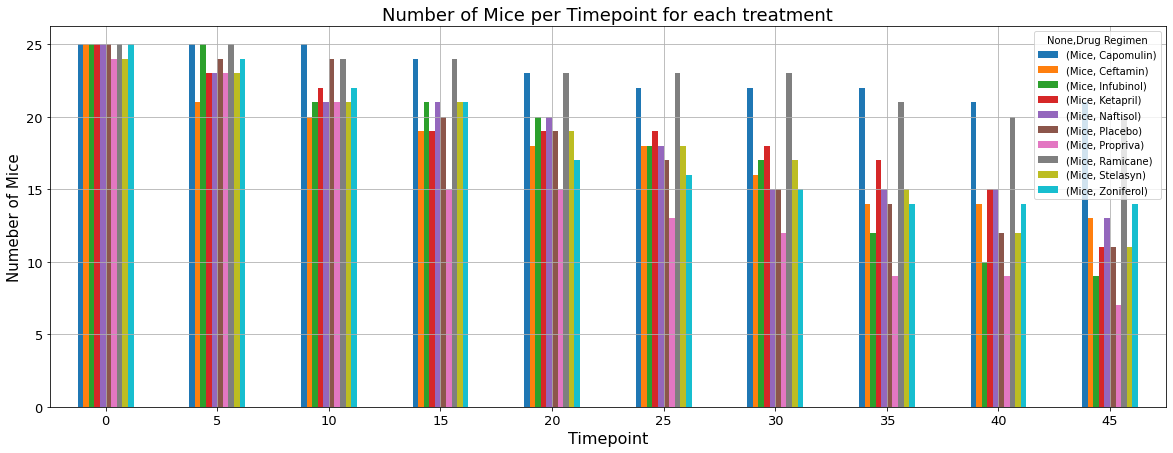

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

data = mice_plot_data.set_index(['Timepoint', 'Drug Regimen'])
mice_pandas_plot=data.unstack().plot(kind='bar',figsize=(20,7), rot=0,fontsize=13, grid=True)
mice_pandas_plot.set_title('Number of Mice per Timepoint for each treatment',fontsize=18)
mice_pandas_plot.set_xlabel('Timepoint',fontsize=16)
mice_pandas_plot.set_ylabel('Numeber of Mice',fontsize=15)

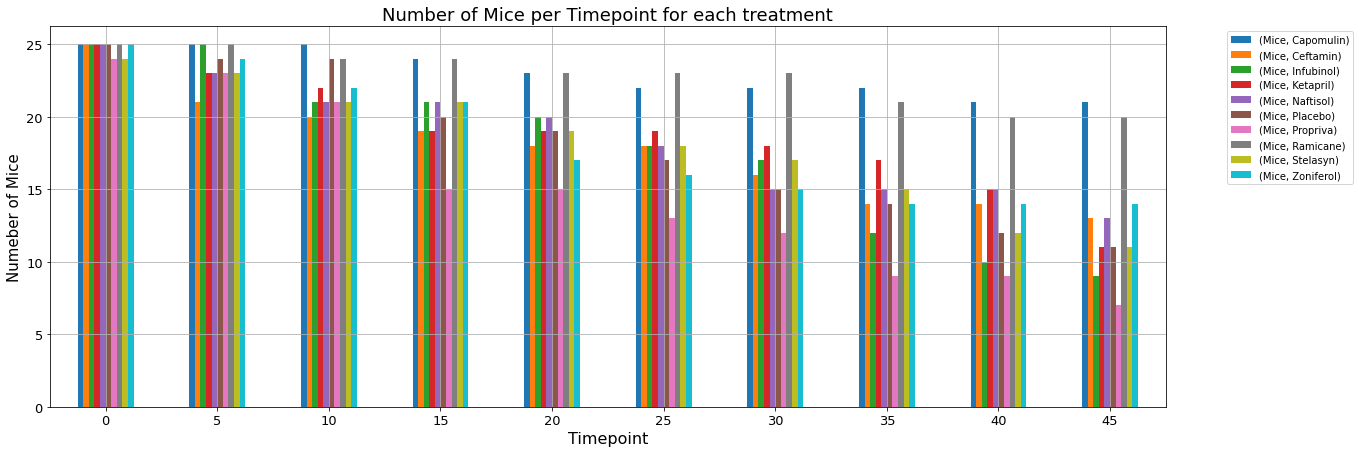

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

data = mice_plot_data.set_index(['Timepoint', 'Drug Regimen'])
mice_pandas_plot=data.unstack().plot(kind='bar', figsize=(20,7),rot=0,fontsize=13, grid=True)
plt.title('Number of Mice per Timepoint for each treatment',fontsize=18)
plt.xlabel('Timepoint',fontsize=16)
plt.ylabel('Numeber of Mice',fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Pie Plots

In [16]:
pie_plot_data=clean_complete_data[["Mouse ID","Sex"]]

pie_plot_data=pie_plot_data[~pie_plot_data.duplicated(subset=['Mouse ID'])]
pie_plot_data=pie_plot_data.groupby("Sex").count()
pie_plot_data

,Mouse ID
Sex,
Female,123
Male,125


Text(0.5, 1.0, 'Sex of Mice')

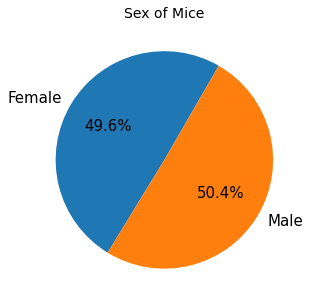

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex_pandas=pie_plot_data.plot(kind="pie", y='Mouse ID',figsize=(5, 5),startangle=60,autopct='%1.1f%%',fontsize=15,legend=False)
mice_sex_pandas.set_ylabel('')
mice_sex_pandas.set_title('Sex of Mice',fontsize=14)

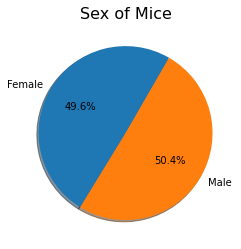

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=pie_plot_data.reset_index()
labels=labels["Sex"]
mice_sex_pyplot=plt.pie(pie_plot_data["Mouse ID"],labels=labels, autopct="%1.1f%%",shadow=True, startangle=60)
plt.title('Sex of Mice',fontsize=16)
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
import scipy.stats as sts
mice_plot_data["Timepoint"].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [20]:
clean_complete_data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [21]:
promising_treatments=mice_plot_data[mice_plot_data["Timepoint"]==45]

promising_treatments=promising_treatments.loc[promising_treatments["Drug Regimen"].isin(["Capomulin", "Ramicane","Infubinol","Ceftamin"])]

promising_treatments=promising_treatments.groupby("Timepoint").sum()
promising_treatments   

,Mice
Timepoint,
45,63


In [135]:
tumor_volume_across_promising_treatments=clean_complete_data.loc[clean_complete_data["Drug Regimen"].isin(["Capomulin", "Ramicane","Infubinol","Ceftamin"]) & (clean_complete_data["Timepoint"]==45)]
tumor_volume_across_promising_treatments.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [137]:
tumor_volume_data=tumor_volume_across_promising_treatments["Tumor Volume (mm3)"]
tumor_volume_data

9       22.050126
19      23.343598
29      28.484033
39      28.430964
49      29.128472
          ...    
1784    61.386660
1800    67.685569
1832    68.594745
1842    64.729837
1859    62.754451
Name: Tumor Volume (mm3), Length: 63, dtype: float64

In [146]:
each_drug_tumor_volume=tumor_volume_across_promising_treatments[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
each_drug_tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
1784,x822,Ceftamin,61.386660
1800,y163,Infubinol,67.685569
1832,y769,Ceftamin,68.594745
1842,y865,Ceftamin,64.729837


In [148]:
each_drug_tumor_volume["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'], dtype=object)

In [150]:
each_drug_tumor_volume=each_drug_tumor_volume.groupby(["Drug Regimen","Mouse ID"]).mean().reset_index()
each_drug_tumor_volume

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,g288,37.074024
3,Capomulin,g316,40.159220
4,Capomulin,i557,47.685963
...,...,...,...
58,Ramicane,q597,45.220869
59,Ramicane,r811,37.225650
60,Ramicane,s508,30.276232
61,Ramicane,u196,40.667713


In [156]:
capomulin_each_drug_tumor_volume=each_drug_tumor_volume.loc[each_drug_tumor_volume["Drug Regimen"]=="Capomulin"]
capomulin_each_drug_tumor_volume=capomulin_each_drug_tumor_volume["Tumor Volume (mm3)"]

ramicane_each_drug_tumor_volume=each_drug_tumor_volume.loc[each_drug_tumor_volume["Drug Regimen"]=="Ramicane"]
ramicane_each_drug_tumor_volume=ramicane_each_drug_tumor_volume["Tumor Volume (mm3)"]

infubinol_each_drug_tumor_volume=each_drug_tumor_volume.loc[each_drug_tumor_volume["Drug Regimen"]=="Infubinol"]
infubinol_each_drug_tumor_volume=infubinol_each_drug_tumor_volume["Tumor Volume (mm3)"]

ceftamin_each_drug_tumor_volume=each_drug_tumor_volume.loc[each_drug_tumor_volume["Drug Regimen"]=="Ceftamin"]
ceftamin_each_drug_tumor_volume=ceftamin_each_drug_tumor_volume["Tumor Volume (mm3)"]

In [207]:
# CORRECTA Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_names=['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
drug_databases=[ramicane_each_drug_tumor_volume,capomulin_each_drug_tumor_volume,infubinol_each_drug_tumor_volume,ceftamin_each_drug_tumor_volume]


for x in range(len(drug_names)): 
    quartiles = drug_databases[x].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of tumor volume for the drug {drug_names[x]} is: {lowerq} mm3")
    print(f"The upper quartile of tumor volume for the drug {drug_names[x]} is: {upperq} mm3")
    print(f"The interquartile range of tumor volume for the drug {drug_names[x]} is: {iqr} mm3")
    print(f"The the median of tumor volume for the drug {drug_names[x]} is: {quartiles[0.5]} mm3")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} mm3 could be outliers.")
    print(f"""Values above {upper_bound} mm3 could be outliers.
    
    """)

print(f"""
According to these results, there seems to not be outliers for each of the Drug Regimens
""")

The lower quartile of tumor volume for the drug Ramicane is: 30.981175224999998 mm3
The upper quartile of tumor volume for the drug Ramicane is: 38.508305307499995 mm3
The interquartile range of tumor volume for the drug Ramicane is: 7.527130082499998 mm3
The the median of tumor volume for the drug Ramicane is: 34.848627300000004 mm3
Values below 19.690480101250003 mm3 could be outliers.
Values above 49.79900043124999 mm3 could be outliers.
    
    
The lower quartile of tumor volume for the drug Capomulin is: 32.37735684 mm3
The upper quartile of tumor volume for the drug Capomulin is: 40.1592203 mm3
The interquartile range of tumor volume for the drug Capomulin is: 7.781863460000004 mm3
The the median of tumor volume for the drug Capomulin is: 37.31184577 mm3
Values below 20.70456164999999 mm3 could be outliers.
Values above 51.83201549 mm3 could be outliers.
    
    
The lower quartile of tumor volume for the drug Infubinol is: 62.75445141 mm3
The upper quartile of tumor volume fo

In [24]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tumor_volume_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq} mm3")
print(f"The upper quartile of tumor volume is: {upperq} mm3")
print(f"The interquartile range of tumor volume is: {iqr} mm3")
print(f"The the median of tumor volume is: {quartiles[0.5]} mm3")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} mm3 could be outliers.")
print(f"Values above {upper_bound} mm3 could be outliers.")

print(f"""

According to these results, there seems to not be outliers on this study

""")

The lower quartile of tumor volume is: 33.48002734 mm3
The upper quartile of tumor volume is: 62.14221369 mm3
The interquartile range of tumor volume is: 28.66218635 mm3
The the median of tumor volume is: 40.1592203 mm3
Values below -9.513252184999999 mm3 could be outliers.
Values above 105.135493215 mm3 could be outliers.


According to these results, there seems to not be outliers on this study




In [25]:
tumor_volume=tumor_volume_data.to_numpy(dtype=object)
np.sort(tumor_volume)

array([22.05012627, 23.34359787, 28.43096411, 28.48403281, 29.12847181,
       30.27623175, 30.56462509, 30.63869575, 31.02392294, 31.09533505,
       31.56046955, 31.896238399999998, 32.37735684, 32.97852192,
       33.32909778, 33.39765251, 33.56240217, 34.45529799, 36.04104736,
       36.13485243, 36.37451039, 37.07402422, 37.22565033, 37.31123552,
       37.31184577, 38.125164399999996, 38.407618299999996, 38.81036633,
       38.84687569, 38.93963263, 38.98287774, 40.1592203, 40.65812366,
       40.65900627, 40.66771292, 40.72857787, 41.48300765, 41.58152074,
       43.04754260000001, 45.22086888, 47.68596303, 59.74190064,
       59.85195552, 60.91876652, 61.38666032, 61.43389223, 61.84902336,
       62.43540402, 62.75445141, 62.99935619, 64.29983003, 64.63494887,
       64.72983655, 65.52574285, 66.08306589, 66.19691151, 67.52748237,
       67.68556862, 67.74866174, 67.97341878, 68.59474498, 68.92318457,
       72.2267309], dtype=object)


Final tumor volume for the 4 most promising treatments

According to these results, there seems to not be outliers on each of them



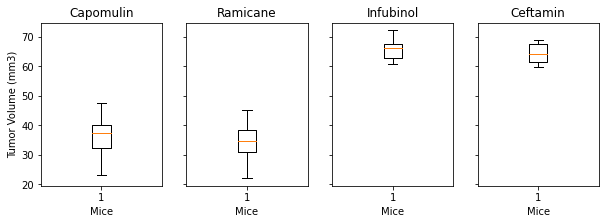

In [196]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3), sharey=True)
axs[0].boxplot(capomulin_each_drug_tumor_volume)
axs[0].set_title('Capomulin')
axs[0].set(ylabel='Tumor Volume (mm3)')

axs[1].boxplot(ramicane_each_drug_tumor_volume)
axs[1].set_title('Ramicane')

axs[2].boxplot(infubinol_each_drug_tumor_volume)
axs[2].set_title('Infubinol')

axs[3].boxplot(ceftamin_each_drug_tumor_volume)
axs[3].set_title('Ceftamin')

for ax in axs.flat:
    ax.set(xlabel='Mice')

print(f"""
Final tumor volume for the 4 most promising treatments

According to these results, there seems to not be outliers on each of them
""")

plt.show()


According to these results, there seems to not be outliers on this study



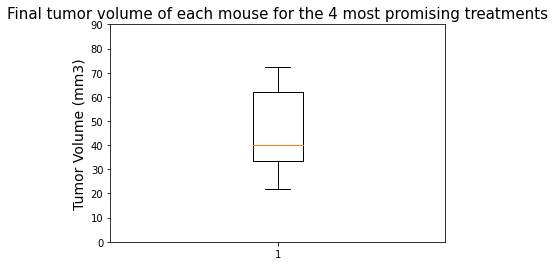

In [129]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_graph = plt.subplots()
plt.title('Final tumor volume of each mouse for the 4 most promising treatments',fontsize=15)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)
plt.boxplot(tumor_volume_data)
plt.ylim(0,90)

print(f"""
According to these results, there seems to not be outliers on this study
""")

plt.show()

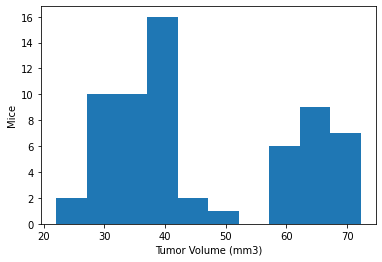

NormaltestResult(statistic=39.54038267198831, pvalue=2.5936716594423824e-09)


In [27]:
plt.hist(tumor_volume_data)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Mice')
plt.show()
print(sts.normaltest(tumor_volume_data.sample(63)))

## Line and Scatter Plots

In [28]:
capomulin_data=clean_complete_data.loc[clean_complete_data["Drug Regimen"]=="Capomulin",:]
capomulin_data

capomulin_data=capomulin_data[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
mice_with_capomulin_data=capomulin_data.groupby("Timepoint").mean().reset_index()
mice_with_capomulin_data

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,44.266086
2,10,43.084291
3,15,42.064317
4,20,40.716325
5,25,39.939528
6,30,38.769339
7,35,37.816839
8,40,36.958001
9,45,36.236114


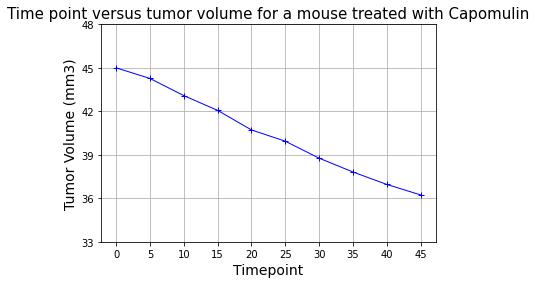

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

plt.plot(mice_with_capomulin_data["Timepoint"],mice_with_capomulin_data["Tumor Volume (mm3)"],marker='+',color="blue", linewidth=1)
plt.xlabel("Timepoint", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.title("Time point versus tumor volume for a mouse treated with Capomulin", fontsize=15)
plt.yticks(np.arange(33, 51, 3))
plt.xticks(np.arange(0, 50, 5))
plt.grid()
plt.show()

In [35]:
capomulin_data=capomulin_data[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
test=capomulin_data.groupby(["Mouse ID","Timepoint"]).mean()
test

Tumor Volume (mm3)
Mouse ID Timepoint                    
b128     0                   45.000000
         5                   45.651331
         10                  43.270852
         15                  43.784893
         20                  42.731552
...                                ...
y793     25                  38.992734
         30                  35.726023
         35                  36.327870
         40                  31.475411
         45                  31.896238

[230 rows x 1 columns]

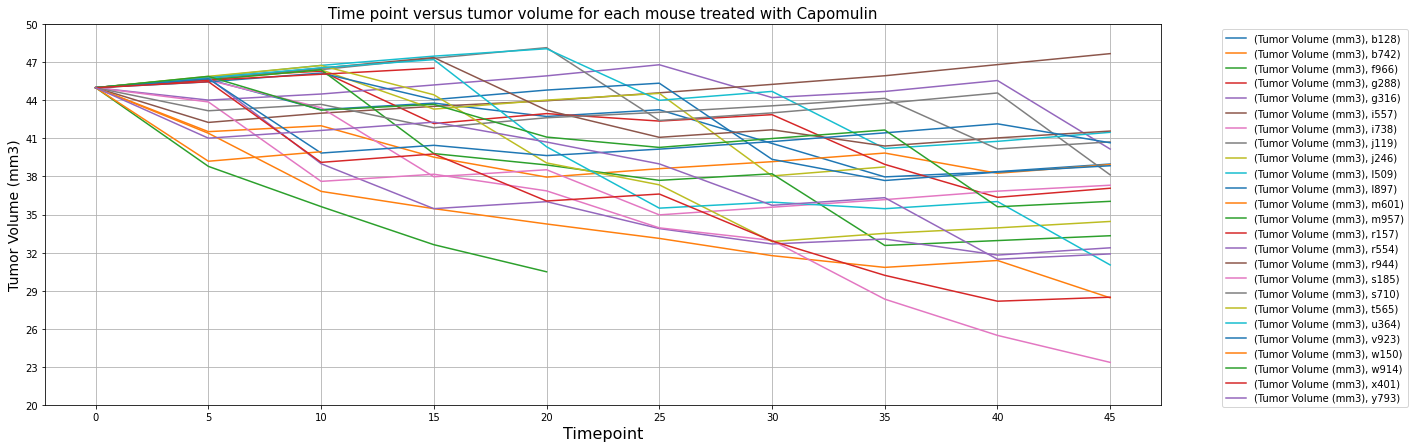

In [48]:
test.unstack(level=0).plot(kind='line',figsize=(20,7),grid=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.yticks(np.arange(20, 53, 3))
plt.xticks(np.arange(0, 50, 5))

plt.title("Time point versus tumor volume for each mouse treated with Capomulin", fontsize=15)
plt.xlabel('Timepoint',fontsize=16)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

plt.show()

In [83]:
capomulin_and_weight_data=clean_complete_data.loc[clean_complete_data["Drug Regimen"]=="Capomulin",:]
capomulin_and_weight_data=capomulin_and_weight_data[["Weight (g)","Tumor Volume (mm3)"]]

capomulin_and_weight_data=capomulin_and_weight_data.groupby("Weight (g)").mean()
capomulin_and_weight_data=capomulin_and_weight_data.reset_index()
capomulin_and_weight_data

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


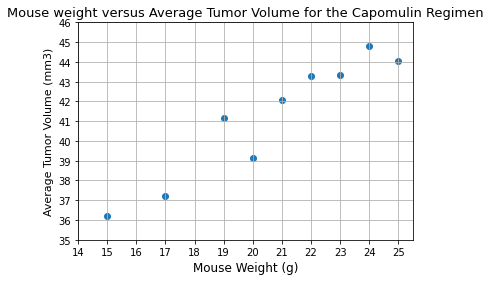

In [123]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight=capomulin_and_weight_data["Weight (g)"]
tumor_volume=capomulin_and_weight_data["Tumor Volume (mm3)"]

plt.scatter(mouse_weight,tumor_volume)
plt.yticks(np.arange(35, 47, 1))
plt.xticks(np.arange(14, 26, 1))
plt.grid()

plt.title("Mouse weight versus Average Tumor Volume for the Capomulin Regimen", fontsize=13)
plt.xlabel('Mouse Weight (g)',fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=11)

plt.show()

## Correlation and Regression

In [102]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

capomulin_and_weight_data

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


The correlation coefficient between both factors is 0.95
The r-squared is: 0.9034966277438606


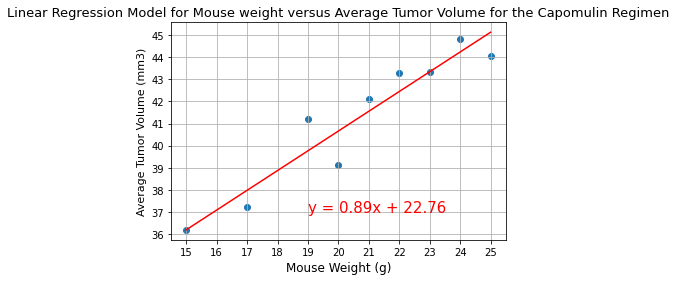

In [127]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight,tumor_volume)
plt.yticks(np.arange(35, 47, 1))
plt.xticks(np.arange(14, 26, 1))
plt.grid()

plt.title("Linear Regression Model for Mouse weight versus Average Tumor Volume for the Capomulin Regimen", fontsize=13)
plt.xlabel('Mouse Weight (g)',fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=11)

plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(19,37),fontsize=15,color="red")

correlation=st.pearsonr(mouse_weight,tumor_volume)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

print(f"The r-squared is: {rvalue**2}")

plt.show()